# GEOS版本OCO2算法比较

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from maplot import map_plot_surface_sub, map_plot_surface
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['Arial']

chnPath = "H:\\XCO2\\OCO2_GEOS_L3_v10r\\CHN_year\\"
latPath = "H:\\XCO2\\OCO2_GEOS_L3_v10r\\LAT_year_wsj\\"
nePath = "H:\\XCO2\\OCO2_GEOS_L3_v10r\\NE_year\\"
odiacPath = "H:\\CO2\\ODIAC\\2022\\year\\"

china = np.load("china_area.npy") > 0.0

In [2]:
def read(path, year, filename):
    d = np.load(path + filename.format(year))
    d[~china] = np.NaN

    return d

def distribution(path, vmin, vmax, algo, filename="MappingXCO2_{}.npy"):
    plt.figure(figsize=(14, 10))
    sub = 331
    data = np.array([read(path, year, filename) for year in range(2015, 2022)])
    data = (data - np.nanmean(data)) / np.nanstd(data)
    for i in range(0, 7):
        plt.subplot(sub)
        map_plot_surface_sub(data[i], "viridis", vmin, vmax, f"{algo} {i+2015}")
        sub += 1
    plt.show()
    
    map_plot_surface(data.mean(axis=0), "viridis", vmin, vmax, f"7-year Average ({algo})", figsize=(8, 8))

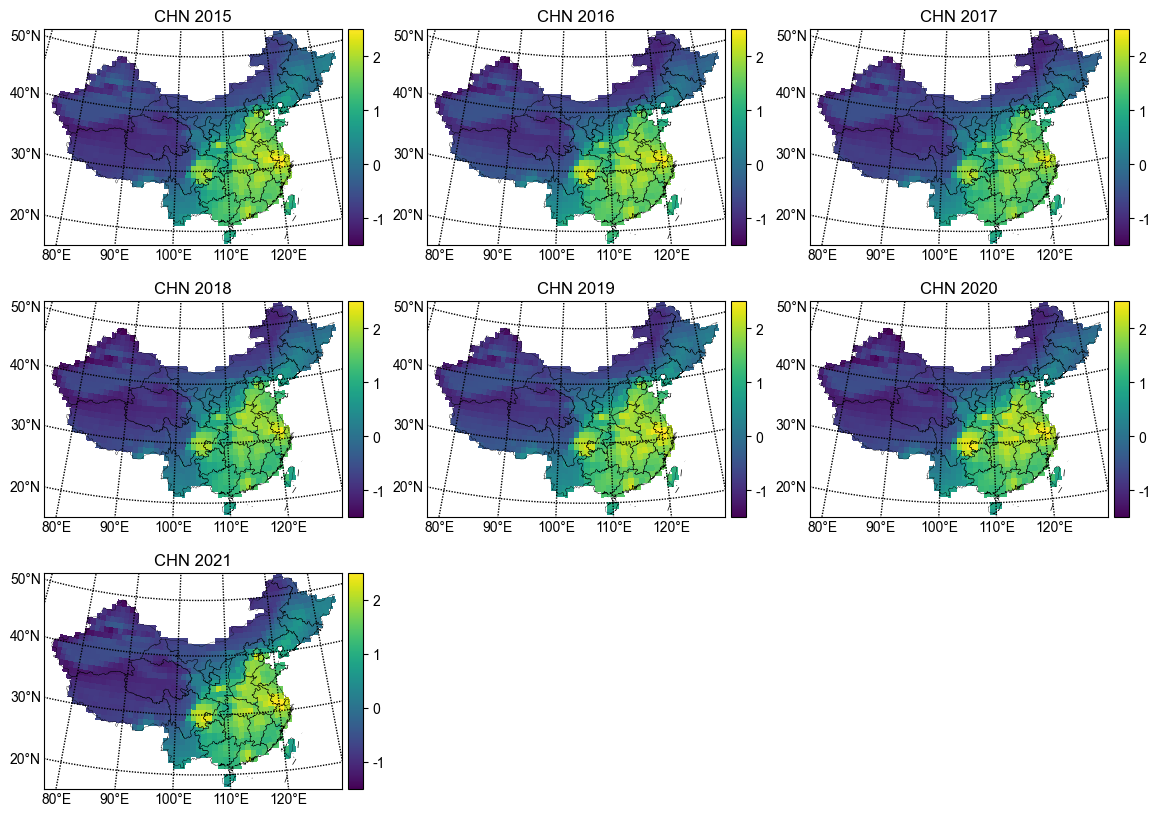

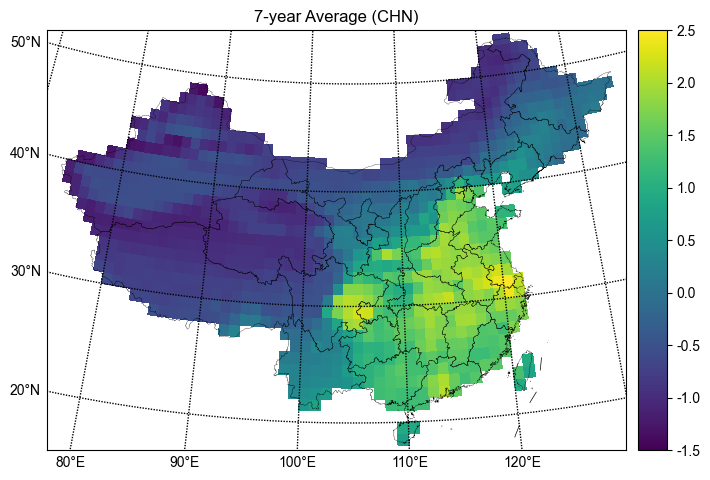

In [3]:
distribution(chnPath, -1.5, 2.5, "CHN")

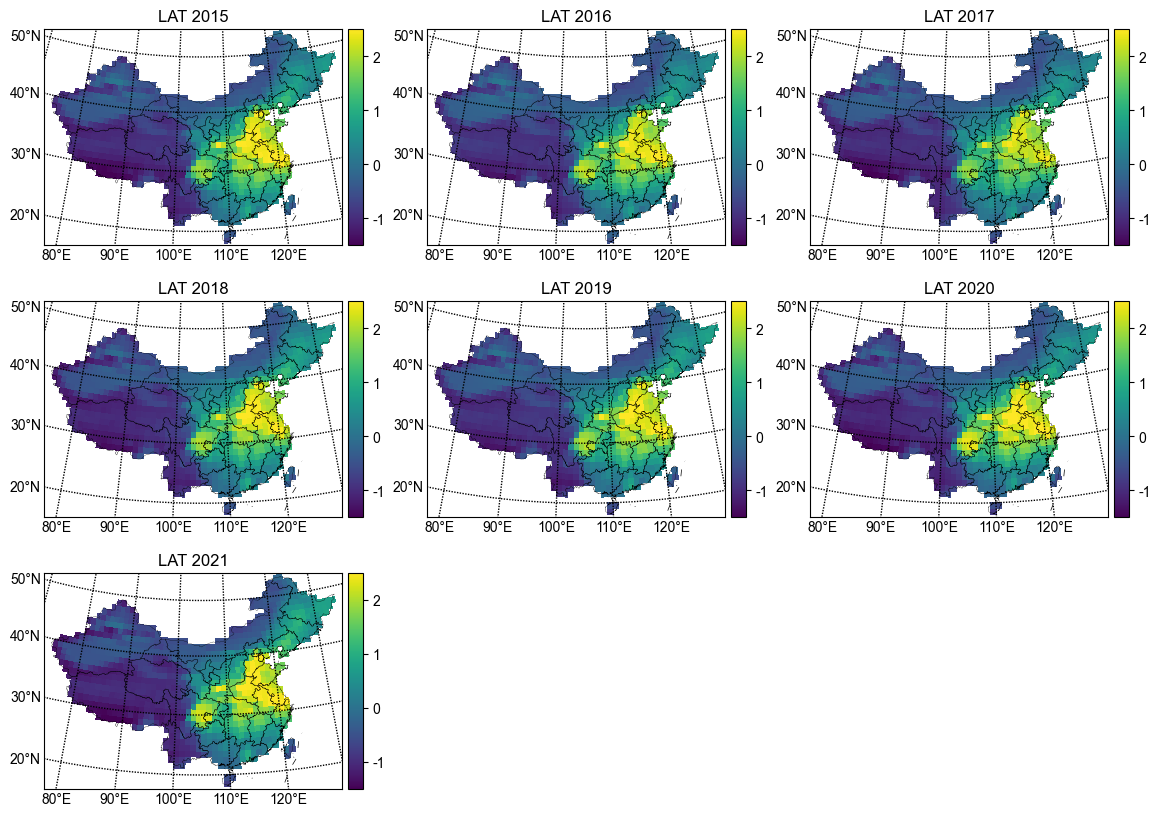

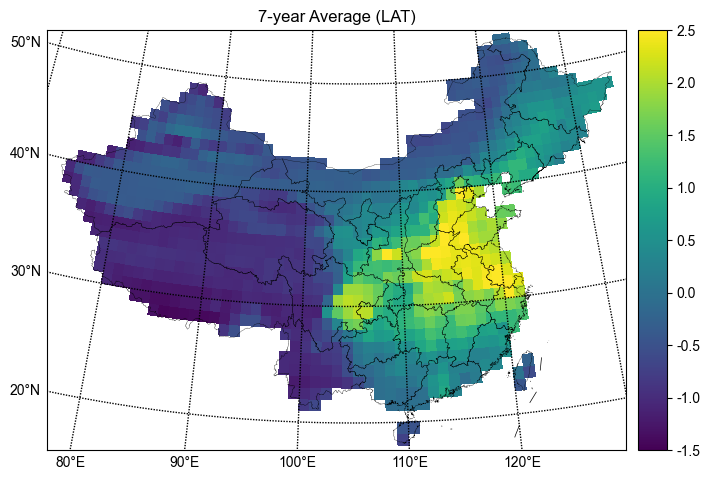

In [4]:
distribution(latPath, -1.5, 2.5, "LAT")

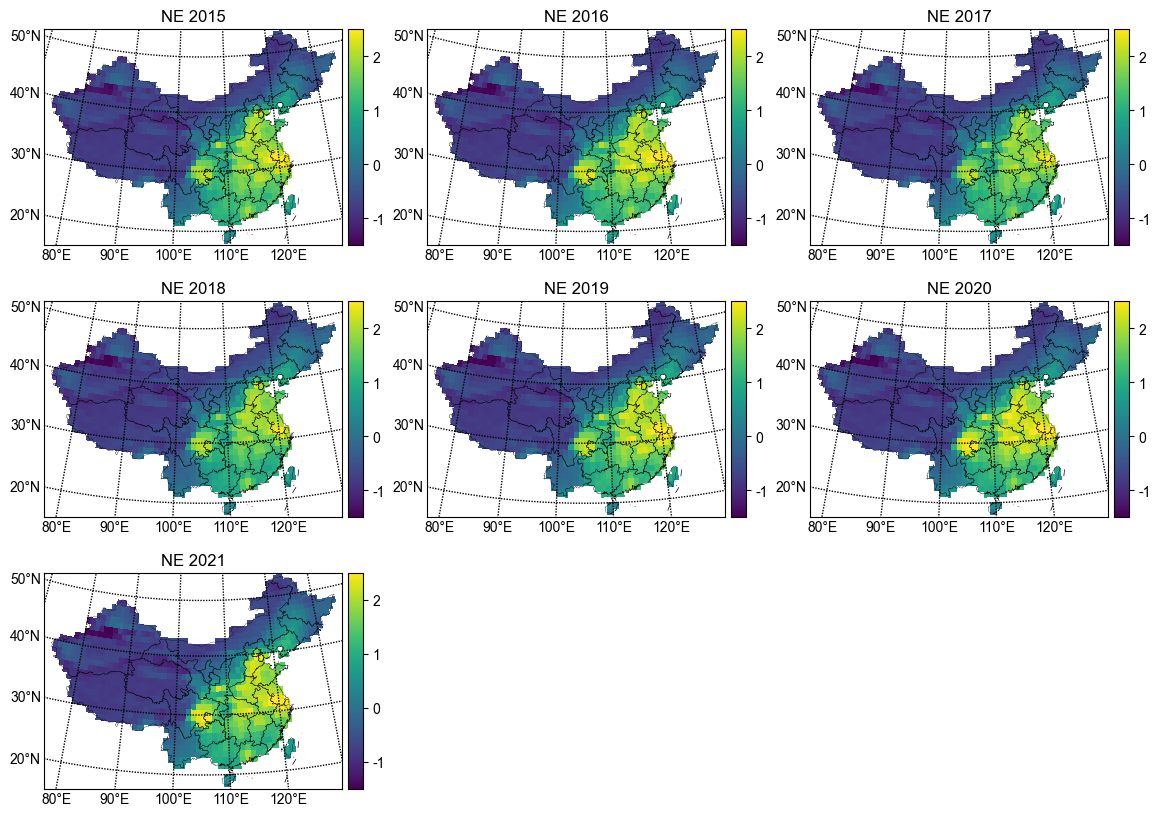

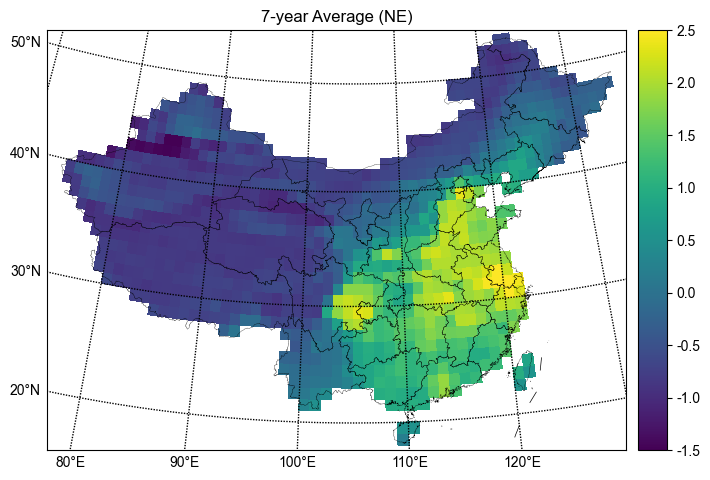

In [5]:
distribution(nePath, -1.5, 2.5, "NE")

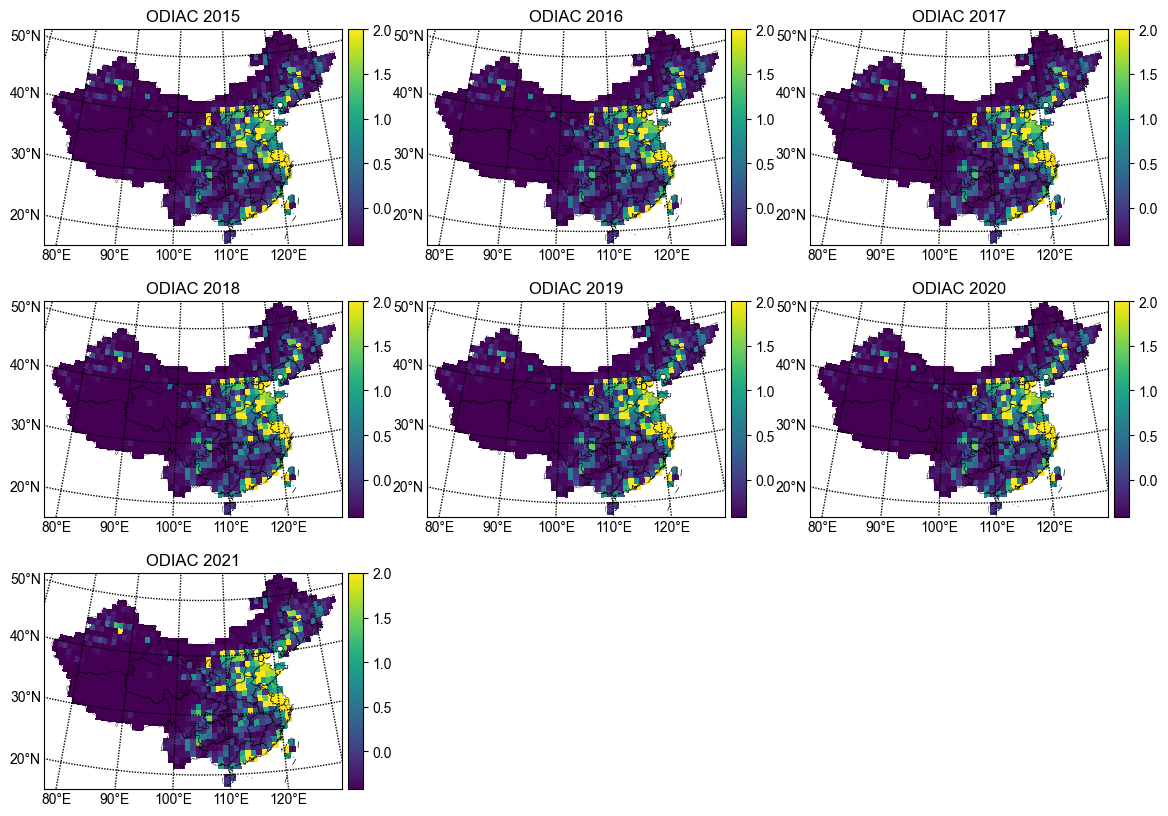

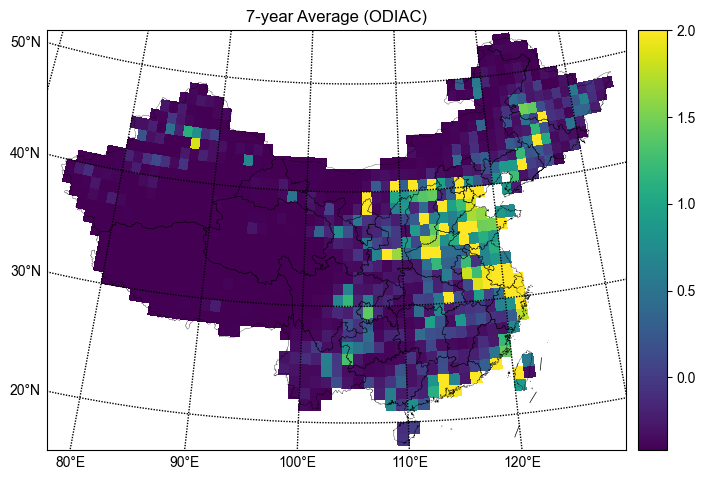

In [6]:
distribution(odiacPath, None, 2.0, "ODIAC", filename="ODIAC_{}.npy")

In [7]:
def relation(path, algo, filename="MappingXCO2_{}.npy", bottom=0.0):
    plt.figure(figsize=(14, 10))
    sub = 331
    data = np.array([read(path, year, filename) for year in range(2015, 2022)])
    odiac = np.array([read(odiacPath, year, "ODIAC_{}.npy") for year in range(2015, 2022)])
    data = (data - np.nanmean(data)) / np.nanstd(data)
    for i in range(0, 7):
        plt.subplot(sub)
        OCO_npy = data[i]
        MAP_npy = odiac[i]
        OCO = OCO_npy[china]
        MAP = MAP_npy[china]
        map_ano = MAP[~np.isnan(OCO)]
        oco_ano = OCO[~np.isnan(OCO)]
    
        # oco_ano = oco_ano[map_ano > bottom]
        # map_ano = map_ano[map_ano > bottom]
    
        r2 = r2_score(map_ano, oco_ano)
        r = pd.DataFrame([oco_ano, map_ano], index=["OCO2_ano", "Mapping_ano"]).T.corr().iloc[0, 1]
    
        p = curve_fit(lambda x, k, b: k*x + b, oco_ano, map_ano)[0]
    
        plt.subplot(sub)
        plt.scatter(oco_ano, map_ano, alpha=0.5)
        plt.plot(np.linspace(-4, 6, 3), p[0] * np.linspace(-4, 6, 3) + p[1], color="blue")
        plt.plot(np.linspace(-4, 6, 3), np.linspace(-4, 6, 3), color="red")
        # plt.xlim(-4, 6)
        # plt.ylim(-4, 6)
        plt.xlabel(f"XCO2 anomaly ({algo})")
        plt.ylabel("ODIAC")
        if p[1] < 0:
            plt.annotate(r"y = {:.3f}x - {:.3f}".format(p[0], -p[1]), xy=(-4.0, 18.0))
        else:
            plt.annotate(r"y = {:.3f}x + {:.3f}".format(p[0], p[1]), xy=(-4.0, 18.0))
        plt.annotate(r"r = {:.3f}".format(r), xy=(-4.0, 16.0))
        plt.annotate(r"R$^2$ = {:.3f}".format(r2), xy=(-4.0, 14.0))
        plt.annotate(f"year: {2015+i}", xy=(-4.0, 12.0))
        sub += 1
    plt.show()

    cut = np.expand_dims(china, axis=0).repeat(7, axis=0)
    ocoAno = data[cut]
    mapAno = odiac[cut]
    # ocoAno = ocoAno[mapAno > bottom]
    # mapAno = mapAno[mapAno > bottom]
    p = curve_fit(lambda x, k, b: k*x + b, ocoAno, mapAno)[0]
    r2 = r2_score(mapAno, ocoAno)
    r = pd.DataFrame([ocoAno, mapAno]).T.corr().iloc[0, 1]
    plt.figure(figsize=(6, 5))
    plt.scatter(ocoAno, mapAno, alpha=0.5)
    plt.plot(np.linspace(-4, 6, 3), p[0] * np.linspace(-4, 6, 3) + p[1], color="blue")
    plt.plot(np.linspace(-4, 6, 3), np.linspace(-4, 6, 3), color="red")
    plt.xlabel(f"XCO2 anomaly {algo}")
    plt.ylabel("ODIAC")
    if p[1] < 0:
        plt.annotate(r"y = {:.3f}x - {:.3f}".format(p[0], -p[1]), xy=(-4.0, 18.0))
    else:
        plt.annotate(r"y = {:.3f}x + {:.3f}".format(p[0], p[1]), xy=(-4.0, 18.0))
    plt.annotate(r"r = {:.3f}".format(r), xy=(-4.0, 16.0))
    plt.annotate(r"R$^2$ = {:.3f}".format(r2), xy=(-4.0, 14.0))
    plt.show()

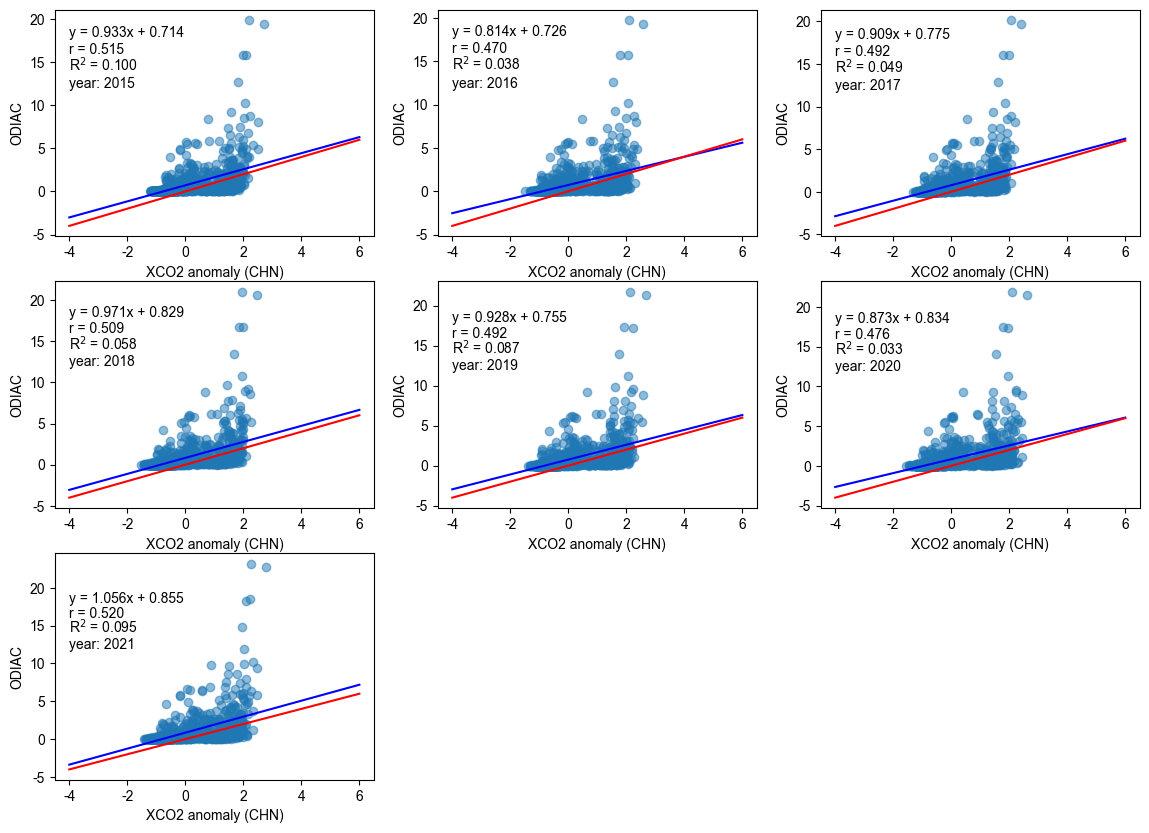

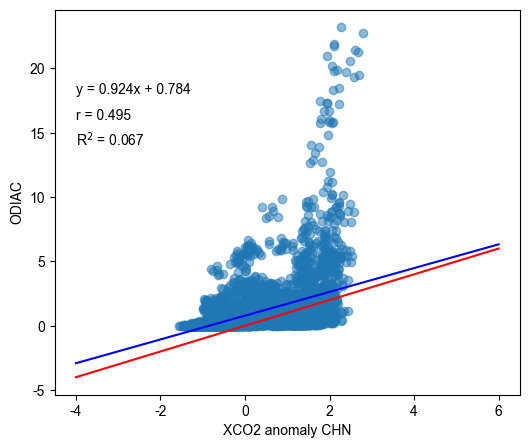

In [8]:
relation(chnPath, "CHN")

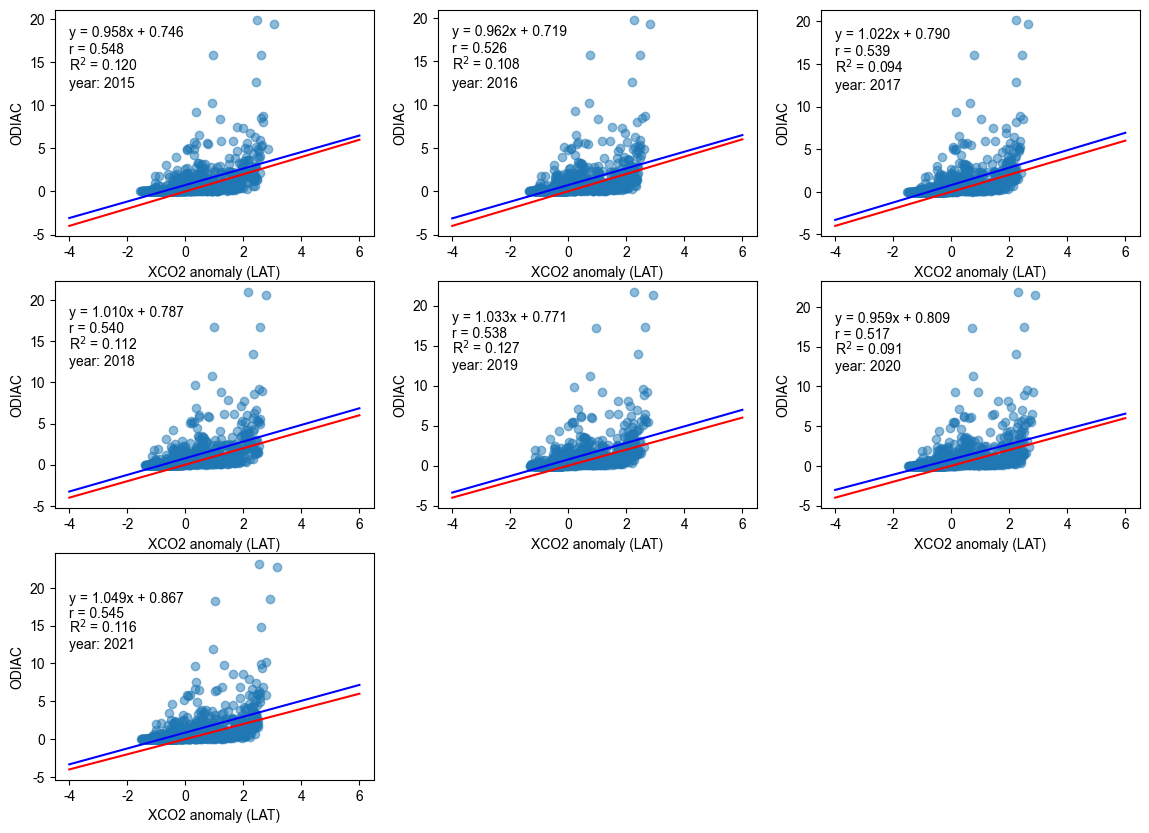

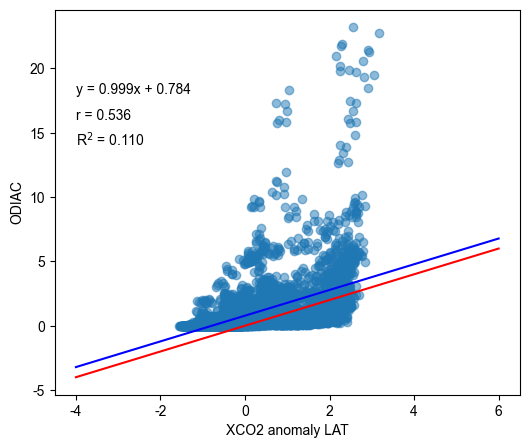

In [9]:
relation(latPath, "LAT")

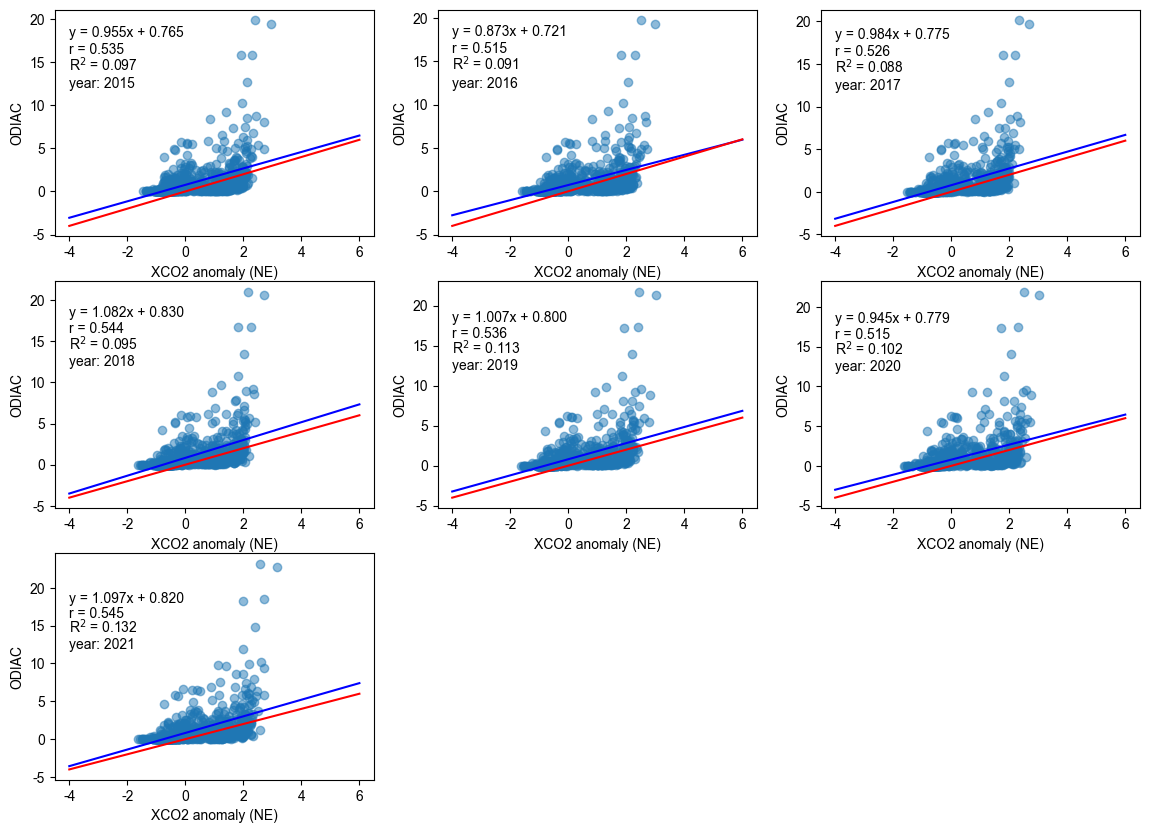

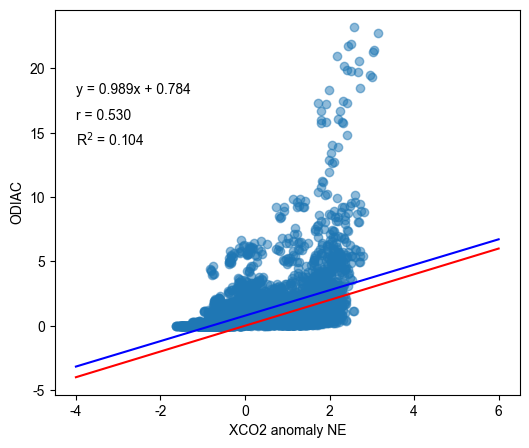

In [10]:
relation(nePath, "NE")